# What exactly is Exponential Smoothing?

Exponential smoothing is a time series forecasting method for univariate data. It is based on the idea that more recent observations should have a higher weight in forecasting than older observations. The method applies exponentially decreasing weights over time.

### Key Points:
1. **Simple Exponential Smoothing (SES)**: Suitable for data without trend or seasonality. The forecast is a weighted average of past observations.
2. **Holt’s Linear Trend Model**: Extends SES to capture linear trends in the data.
3. **Holt-Winters Seasonal Model**: Extends Holt’s model to capture seasonality.

### Formula:
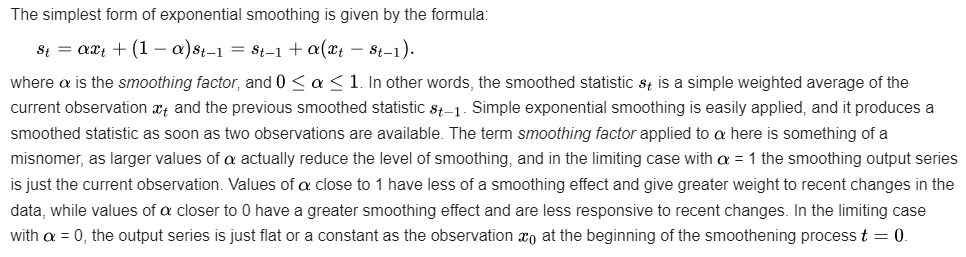
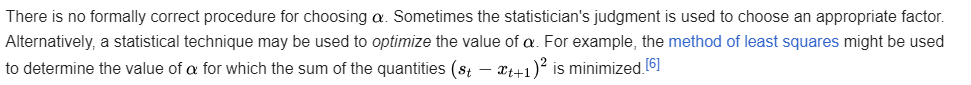


### Example on Excel:
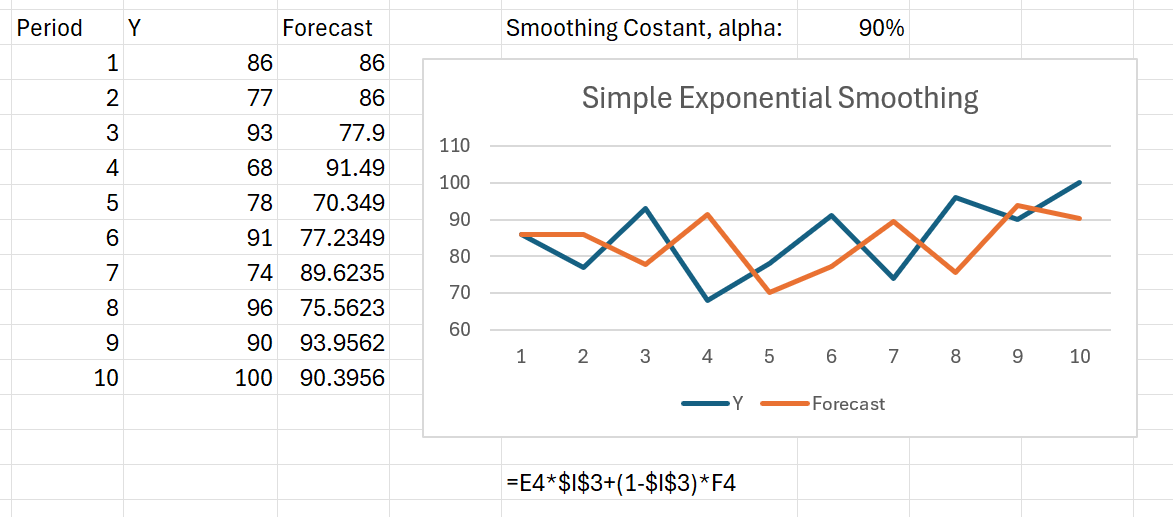


### Advantages:
- Simple to implement
- Requires minimal data storage
- Effective for short-term forecasting

### Disadvantages:
- Not suitable for data with strong trends or seasonality (unless extended models are used)
- Choice of smoothing constant \( \alpha \) can be subjective

## Fit a simple model using SimpleExpSmoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np
import matplotlib.pyplot as plt

#prepare data
random_walk = [50]
for i in range(1, 100):
    random_walk.append(random_walk[i-1] + np.random.normal(0, 1)) #generate random walk


plt.figure(figsize=(10, 6)) #specify figure size before plotting
plt.plot(random_walk)
plt.title('Random Walk')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

In [ ]:
#create model
model = SimpleExpSmoothing(random_walk)
#fit model
model_fit = model.fit()


#plot results
plt.figure(figsize=(10, 6)) #specify figure size before plotting
plt.plot(random_walk)
plt.plot(model_fit.fittedvalues)
plt.title('Random Walk with Simple Exponential Smoothing')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

In [ ]:
pred = model_fit.predict(start=100, end=110)
print(pred)
#plot everything with predictions
plt.figure(figsize=(10, 6)) #specify figure size before plotting
plt.plot(random_walk)
plt.plot(model_fit.fittedvalues)
plt.plot(range(100, 111), pred)  # change the x-axis range to start from 100
plt.title('Random Walk with Simple Exponential Smoothing')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

# How to use the StatsForecast library:

In [ ]:
import pandas as pd
import statsforecast
import numpy as np

#prepare data
random_walk = [50]
for i in range(1, 100):
    random_walk.append(random_walk[i-1] + np.random.normal(0, 1)) #generate random walk


# create a pandas dataframe

df = pd.DataFrame({'ds': list(range(len(random_walk))), 'y': random_walk, 'unique_id': 0 })
df

In [ ]:
import os
# this makes it so that the outputs of the predict methods have the id as a column 
# instead of as the index
os.environ['NIXTLA_ID_AS_COL'] = '1'

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import HoltWinters #the triple exponential smoothing method.

sf = StatsForecast(
    models=[HoltWinters(season_length = 7)], #specify the model and season length
    freq=7 #specify the frequency of the data
)

sf.fit(df)

In [ ]:
forecast_df = sf.predict(h=12, level=[90])
forecast_df

In [ ]:
sf.plot(df, forecast_df, level=[90]) #plot the forecast with the 90% confidence interval

### Cross Validation following official documentation

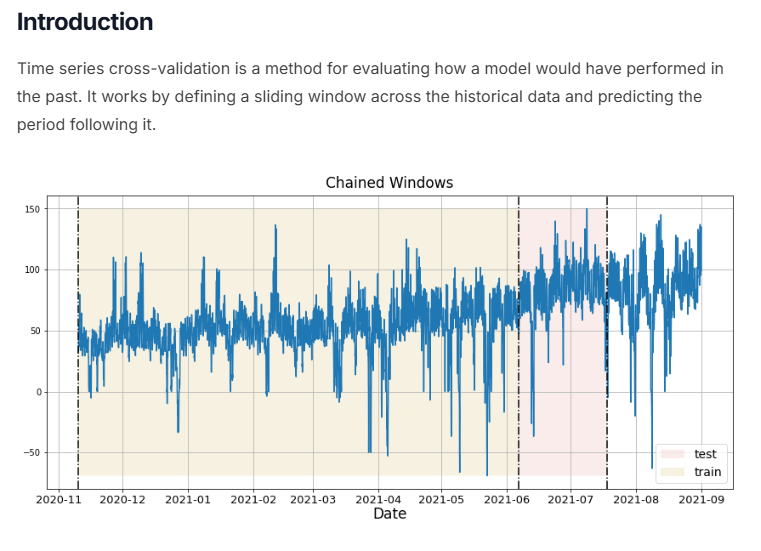

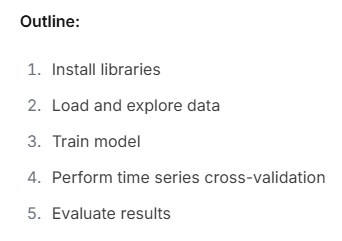

In [ ]:
from statsforecast import StatsForecast # required to instantiate StastForecast object and use cross-validation method

import pandas as pd 

Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet') # load the data 
Y_df.head()

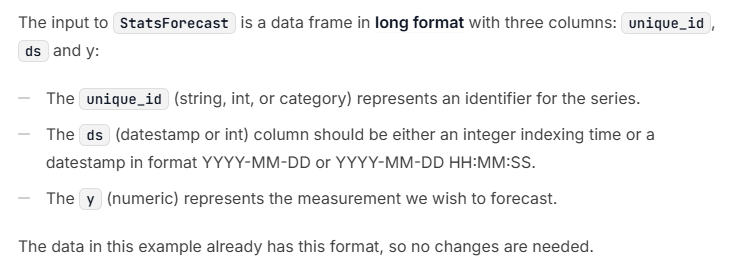

In [ ]:
df = Y_df[Y_df['unique_id'] == 'H1'] # select time series with unique_id = 'H1'
StatsForecast.plot(df)

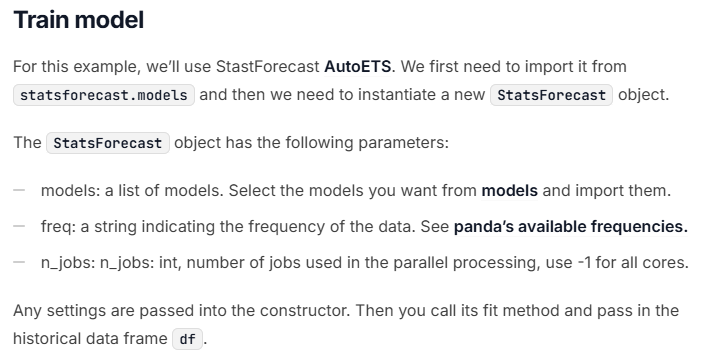

In [ ]:
from statsforecast.models import HoltWinters

models = [HoltWinters(season_length = 24)]

sf = StatsForecast(
    df = df, 
    models = models, 
    freq = 1, #the frequency of the data is 1 hour
    n_jobs = -1
)

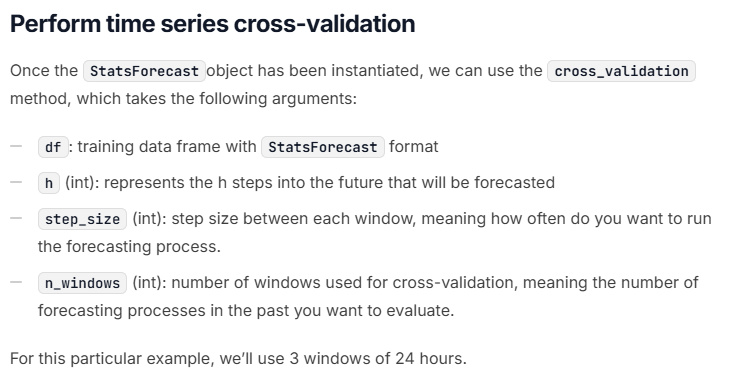

In [ ]:
crossvalidation_df = sf.cross_validation(
    df = df,
    h = 24,
    step_size = 24,
    n_windows = 3
  )

crossvalidation_df.head()

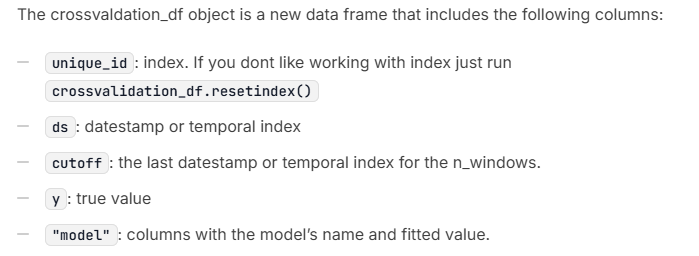

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

crossvalidation_df.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values column
mape = mean_absolute_percentage_error(crossvalidation_df['actual'], crossvalidation_df['HoltWinters'])
print(f"MAPE: {mape * 100:.3f}%")